In [1]:
from pandas import Series, DataFrame
import pandas as pd
import re
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
rating=pd.read_csv('../../animelists_cleaned.csv')

In [3]:
rating.shape

(31284030, 11)

In [4]:
anime_rated_times = pd.Series(rating["anime_id"].value_counts())

In [5]:
print(len(anime_rated_times[anime_rated_times > 1000]),"over", 
      len(anime_rated_times),"animes are rated more than 1000 times")

3897 over 6668 animes are rated more than 1000 times


In [6]:
print(len(anime_rated_times[anime_rated_times > 100]),"over", 
      len(anime_rated_times),"animes are rated more than 1000 times")

5846 over 6668 animes are rated more than 1000 times


In [7]:
unused_anime = set(anime_rated_times[anime_rated_times < 100].index.values)

In [8]:
anime_reduced=rating[rating["anime_id"].map(lambda x: x not in unused_anime)]

In [9]:
user_rate_times = pd.Series(rating["username"].value_counts())

{'whiskers': [<matplotlib.lines.Line2D at 0x22ab7630908>,
 'caps': [<matplotlib.lines.Line2D at 0x22ab7630dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x22ab7630390>],
 'medians': [<matplotlib.lines.Line2D at 0x22ab76419e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22ab7641e10>],
 'means': []}

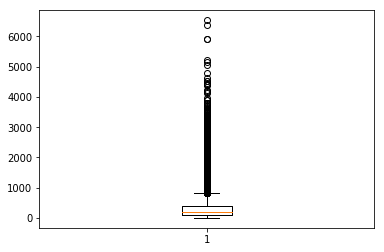

In [10]:
plt.boxplot(user_rate_times)

In [11]:
print(len(user_rate_times[user_rate_times > 5]),"over", len(user_rate_times),"users rate more than 5 times")

106499 over 108709 users rate more than 5 times


In [12]:
unused_user = set(user_rate_times[user_rate_times < 5].index.values)

In [13]:
both_reduced = anime_reduced[anime_reduced["username"].map(lambda x: x not in unused_user)]

In [14]:
both_reduced.shape

(31248594, 11)

In [16]:
both_reduced['user_id'] = pd.factorize(both_reduced['username'])[0]

C:\Users\b0130\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
both_reduced

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags,user_id
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN,0
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN,0
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN,0
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN,0
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN,0
5,karthiga,210,161,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:57:06,NaN,0
6,karthiga,232,70,0000-00-00,0000-00-00,6,2,NaN,0,2013-03-09 17:24:42,NaN,0
7,karthiga,233,78,0000-00-00,0000-00-00,6,2,NaN,0,2013-03-10 05:29:44,NaN,0
8,karthiga,249,167,0000-00-00,0000-00-00,8,2,NaN,0,2013-03-19 16:04:46,NaN,0
9,karthiga,269,366,0000-00-00,0000-00-00,10,2,NaN,0,2013-03-03 09:39:23,NaN,0


In [ ]:
both_reduced.to_csv("animelists_reduced.csv", index=False, header=False)